<a href="https://colab.research.google.com/github/solmvz/MLActivities/blob/main/PolynomialRidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression Using Ridge

Ridge regression is a regularization method used for data with intensely high variance. In this note, I generated some random data and constructed sin function as the relation between X and target variable y, with added noise to test the ridge regression's ablity to capture the polynomial patterns with low complexity models. The term alpha in ridge regression indicates the degree of regularization we are implying to the model. We'll see how the model changes when different alpha values are assigned.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
N = 100
np.random.seed(20)
X = np.sort(np.random.rand(N,1),axis=0)
noise = np.random.normal(0,0.3,size=(N,1))
y = np.sin(2*np.pi*X) + noise

As we see in the plot below, the data cannot be captured with a linear model. Hence, we need to implement a polynomial one.

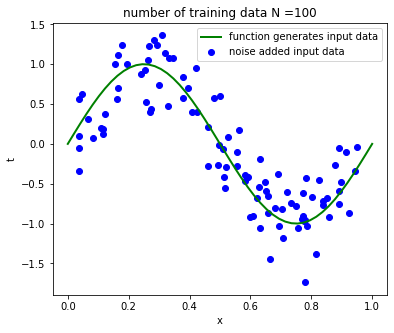

In [19]:
def vis_input_data(X, y):
    np.random.seed(20)
    plt.figure(figsize=(6,5))
    plt.scatter(X,y,c='b',marker='o',label='noise added input data')
    plt.title('number of training data N =' + str(len(X))) 
    plt.xlabel('x');plt.ylabel('t')
    #plt.show()
    
vis_input_data(X,y)
plt.plot(np.linspace(0,1,50),np.sin(2*np.linspace(0,1,50)*np.pi),c='g',linewidth=2,label='function generates input data')

plt.legend()
plt.show()

Now to observe the behaviour of model with respect to alpha, we first put alpha = 0.0 (no regularization) and as expected, the model has a very high variance and is likely to overfit. 

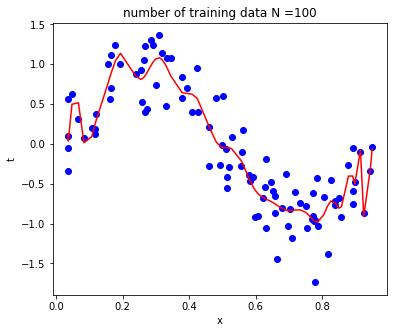

In [20]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

vis_input_data(X, y)
deg_4 = 60
alpha = 0.0
model = make_pipeline(PolynomialFeatures(deg_4),Ridge(alpha=alpha,solver='cholesky'))
model.fit(X,y)
plt.plot(X,model.predict(X),'r',label='sklearn poly fit degree =' + str(deg_4) + ' with alpha=' + str(alpha) )



Notice that with a little increase of alpha, how smooth the model has become. (alpha set to 0.005)

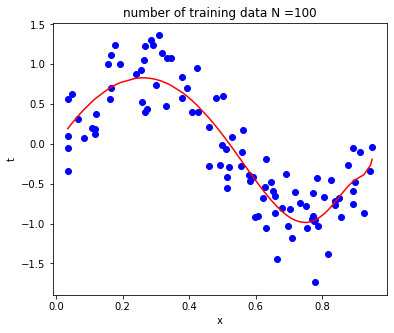

In [28]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

vis_input_data(X, y)
deg_4 = 60
alpha = 0.005
model = make_pipeline(PolynomialFeatures(deg_4),Ridge(alpha=alpha,solver='cholesky'))
model.fit(X,y)
plt.plot(X,model.predict(X),'r',label='sklearn poly fit degree =' + str(deg_4) + ' with alpha=' + str(alpha) )

Setting alpha to 0.80:

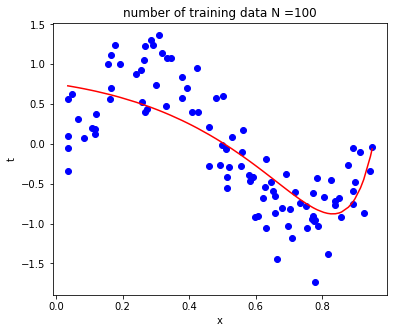

In [32]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

vis_input_data(X, y)
deg_4 = 60
alpha = 0.80
model = make_pipeline(PolynomialFeatures(deg_4),Ridge(alpha=alpha,solver='cholesky'))
model.fit(X,y)
plt.plot(X,model.predict(X),'r',label='sklearn poly fit degree =' + str(deg_4) + ' with alpha=' + str(alpha) )

Taking it to the extreme by alpha=100. The model now has become so regulated that does not represent any information about the relation of actual data.

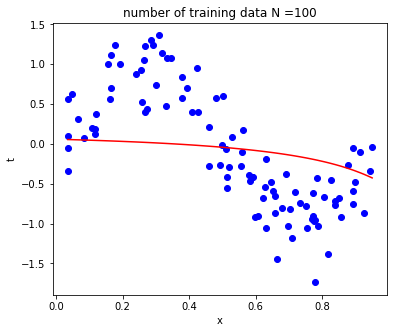

In [31]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

vis_input_data(X, y)
deg_4 = 60
alpha = 100
model = make_pipeline(PolynomialFeatures(deg_4),Ridge(alpha=alpha,solver='cholesky'))
model.fit(X,y)
plt.plot(X,model.predict(X),'r',label='sklearn poly fit degree =' + str(deg_4) + ' with alpha=' + str(alpha) )